In [1]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [2]:
# Load the pre-trained ResNet50 model
resnet = ResNet50(weights="imagenet")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
total_layers = resnet.layers
print(f'Total Layers: {len(total_layers)} ')

Total Layers: 177 


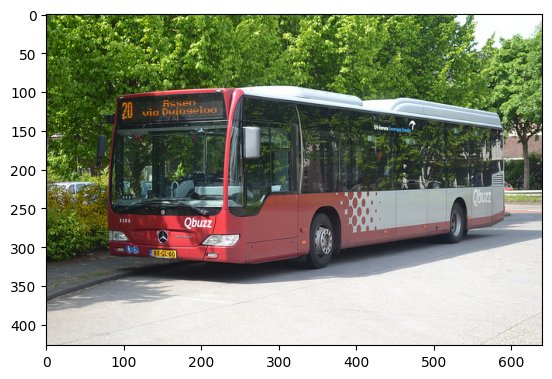

In [4]:
imageSrc = "bus.jpg"
image = imread(imageSrc)
plt.imshow(image)
plt.show()

In [5]:
# Resize the image to 224x224 pixels using PIL
from PIL import Image
pil_image = Image.fromarray(np.uint8(image))
pil_image = pil_image.resize((224, 224))

In [6]:
# Convert the image back to a NumPy array and preprocess it
x = np.asarray(pil_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [7]:
# Make predictions using the model
modelPredictions = resnet.predict(x)

In [8]:
decode = decode_predictions(modelPredictions, top=3)
decode

[[('n04487081', 'trolleybus', 0.948062),
  ('n03895866', 'passenger_car', 0.043689903),
  ('n04146614', 'school_bus', 0.0041593867)]]

In [9]:
# Decode the predictions
_, classname, accuracy = decode_predictions(modelPredictions, top=3)[0][0]

# Print the predicted class and accuracy
print("Predicted class: {}\nAccuracy: {:.2f}%".format(classname.replace("_", " "), accuracy*100))

Predicted class: trolleybus
Accuracy: 94.81%


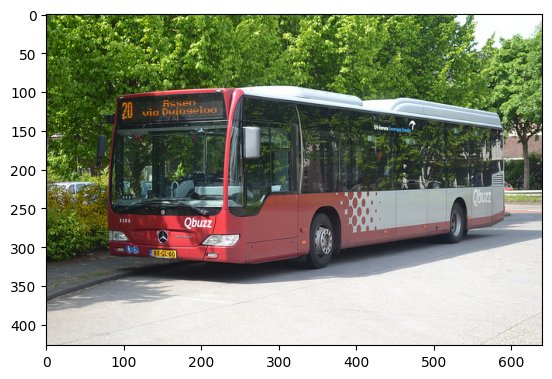

Predicted class: trolleybus
Accuracy: 94.81%


In [10]:
# Display the image
plt.imshow(image)
plt.show()

# Print the predicted class and accuracy
print("Predicted class: {}\nAccuracy: {:.2f}%".format(classname.replace("_", " "), accuracy*100))